In [1]:
import numpy as np
import pandas as pd

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        """
        Initializes the StudentDataset and generates the full dataset.
        :param num_students: Total number of student records to generate
        :param seed: Random seed for reproducibility
        """
        self.num_students = num_students
        self.seed = seed
        np.random.seed(self.seed)
        
        # Generate all attributes during initialization
        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)
        
        # Assemble final DataFrame
        self.dataset = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        """Generate gender with given probabilities."""
        genders = ["Male", "Female", "Other"]
        probs = [0.65, 0.33, 0.02]
        return np.random.choice(genders, size=self.num_students, p=probs).tolist()

    def generate_major(self) -> list[str]:
        """Generate major with given probabilities."""
        majors = ["B.Tech", "MS", "PhD"]
        probs = [0.70, 0.20, 0.10]
        return np.random.choice(majors, size=self.num_students, p=probs).tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        """Generate program based on major-specific conditional probabilities."""
        programs = []
        for major in majors:
            if major == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif major == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:  # PhD
                p = [0.25, 0.25, 0.25, 0.25]
            
            program = np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p)
            programs.append(program)
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        """Generate GPA based on major-specific normal distributions, clipped to [4.0, 10.0]."""
        gpas = []
        for major in majors:
            if major == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif major == "MS":
                mu, sigma = 8.0, 0.7
            else:  # PhD
                mu, sigma = 8.3, 0.5
            
            gpa = np.random.normal(mu, sigma)
            gpa = np.clip(gpa, 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        """Assemble the dataset into a single pandas DataFrame."""
        data = {
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        }
        return pd.DataFrame(data)

    def get_full_dataframe(self) -> pd.DataFrame:
        """Return the generated dataset (without regenerating)."""
        return self.dataset


In [2]:
# Example usage
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

print(df.head())
print(df.describe())
print(df['Major'].value_counts(normalize=True))


   Gender   Major Program   GPA
0    Male  B.Tech     ECE  6.37
1  Female  B.Tech     CSE  9.14
2  Female  B.Tech     CSE  8.67
3    Male  B.Tech     ECE  7.73
4    Male  B.Tech     ECE  6.66
                GPA
count  10000.000000
mean       7.332147
std        1.041597
min        4.000000
25%        6.620000
50%        7.400000
75%        8.100000
max       10.000000
Major
B.Tech    0.6928
MS        0.2051
PhD       0.1021
Name: proportion, dtype: float64


✅ Dataset generated successfully!
   Gender   Major Program   GPA
0    Male  B.Tech     ECE  6.37
1  Female  B.Tech     CSE  9.14
2  Female  B.Tech     CSE  8.67
3    Male  B.Tech     ECE  7.73
4    Male  B.Tech     ECE  6.66

Summary statistics:
                 GPA
count  10000.000000
mean       7.332147
std        1.041597
min        4.000000
25%        6.620000
50%        7.400000
75%        8.100000
max       10.000000


C:\Users\prana\AppData\Local\Temp\ipykernel_112192\6818513.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.dataset, x="Gender", palette="pastel")


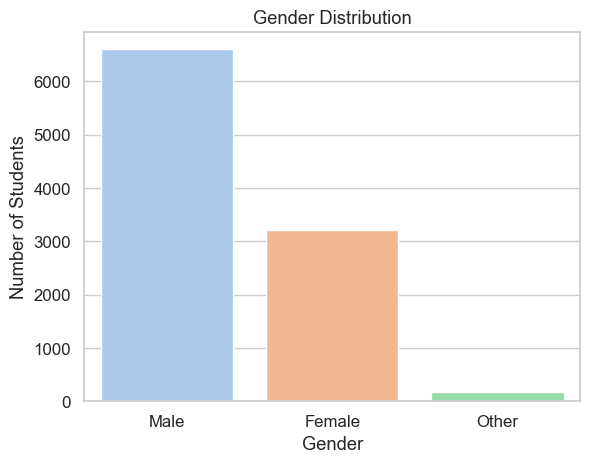

C:\Users\prana\AppData\Local\Temp\ipykernel_112192\6818513.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.dataset, x="Major", palette="coolwarm")


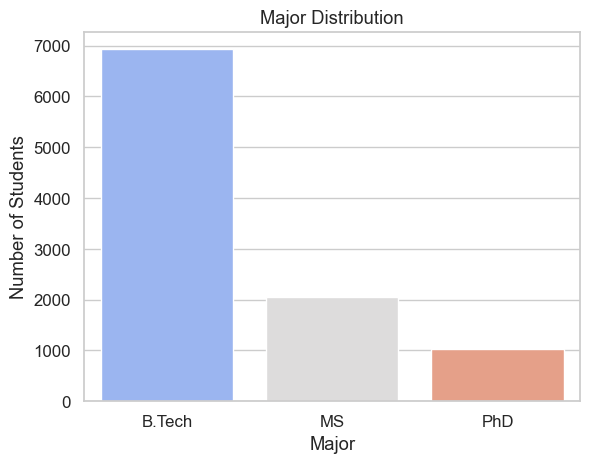

C:\Users\prana\AppData\Local\Temp\ipykernel_112192\6818513.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.dataset, x="Program", palette="Set2")


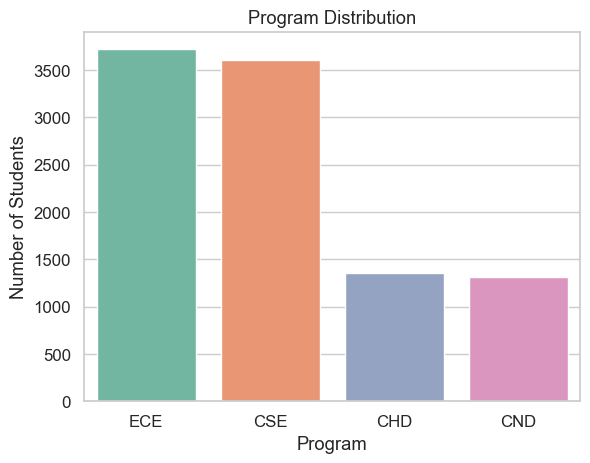

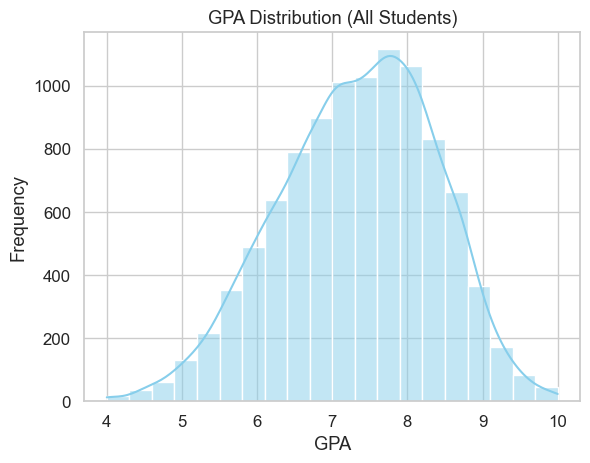

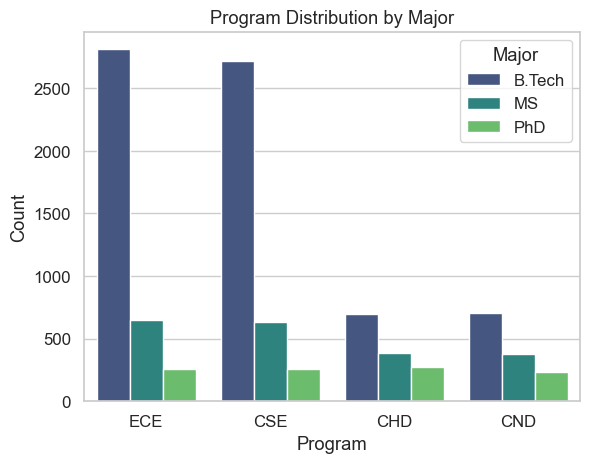

C:\Users\prana\AppData\Local\Temp\ipykernel_112192\6818513.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataset, x="Major", y="GPA", palette="coolwarm")


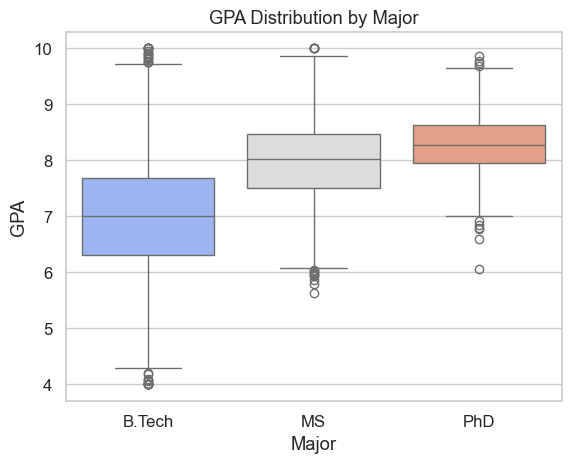

C:\Users\prana\AppData\Local\Temp\ipykernel_112192\6818513.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataset, x="Program", y="GPA", palette="Set3")


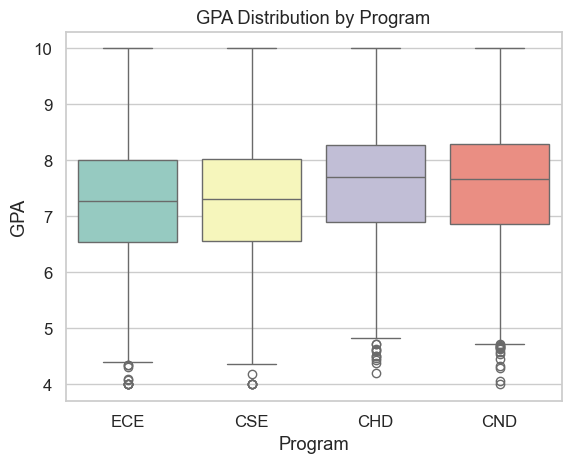

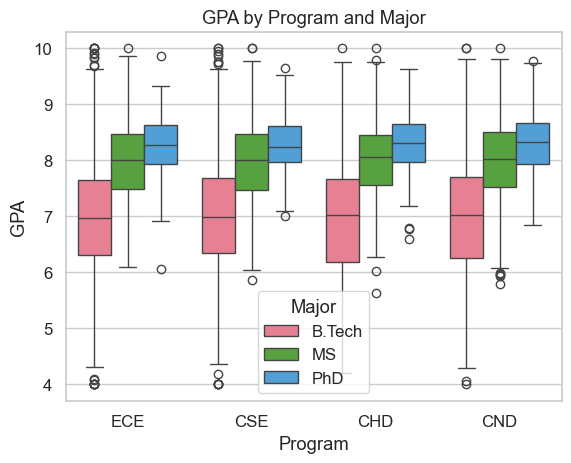

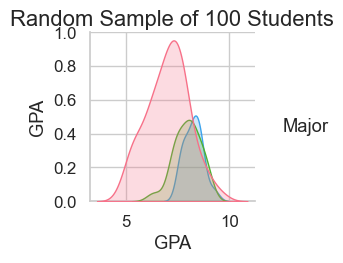

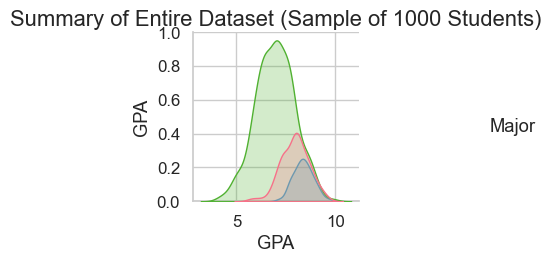

In [4]:
# ---------------------------
# Q1.0 + Q1.1 - Student Dataset + Visualization
# ---------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students

        # Generate attributes
        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)

        # Assemble full DataFrame
        self.dataset = self.assemble_dataframe()

    # ---------------------------
    # DATA GENERATION
    # ---------------------------
    def generate_gender(self):
        return np.random.choice(["Male", "Female", "Other"],
                                size=self.num_students,
                                p=[0.65, 0.33, 0.02])

    def generate_major(self):
        return np.random.choice(["B.Tech", "MS", "PhD"],
                                size=self.num_students,
                                p=[0.7, 0.2, 0.1])

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif m == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return np.array(programs)

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif m == "MS":
                mu, sigma = 8.0, 0.7
            else:
                mu, sigma = 8.3, 0.5
            gpa = np.clip(np.random.normal(mu, sigma), 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return np.array(gpas)

    def assemble_dataframe(self):
        return pd.DataFrame({
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        })

    def get_full_dataframe(self):
        return self.dataset

    # ---------------------------
    # VISUALIZATION METHODS
    # ---------------------------
    def plot_gender_distribution(self):
        sns.countplot(data=self.dataset, x="Gender", palette="pastel")
        plt.title("Gender Distribution")
        plt.ylabel("Number of Students")
        plt.show()

    def plot_major_distribution(self):
        sns.countplot(data=self.dataset, x="Major", palette="coolwarm")
        plt.title("Major Distribution")
        plt.ylabel("Number of Students")
        plt.show()

    def plot_program_distribution(self):
        sns.countplot(data=self.dataset, x="Program", palette="Set2")
        plt.title("Program Distribution")
        plt.ylabel("Number of Students")
        plt.show()

    def plot_gpa_distribution(self, bins: int = 20):
        sns.histplot(self.dataset["GPA"], bins=bins, kde=True, color="skyblue")
        plt.title("GPA Distribution (All Students)")
        plt.xlabel("GPA")
        plt.ylabel("Frequency")
        plt.show()

    def plot_program_by_major(self):
        sns.countplot(data=self.dataset, x="Program", hue="Major", palette="viridis")
        plt.title("Program Distribution by Major")
        plt.ylabel("Count")
        plt.show()

    def plot_gpa_by_major(self):
        sns.boxplot(data=self.dataset, x="Major", y="GPA", palette="coolwarm")
        plt.title("GPA Distribution by Major")
        plt.show()

    def plot_gpa_by_program(self):
        sns.boxplot(data=self.dataset, x="Program", y="GPA", palette="Set3")
        plt.title("GPA Distribution by Program")
        plt.show()

    def plot_gpa_by_program_and_major(self):
        sns.boxplot(data=self.dataset, x="Program", y="GPA", hue="Major", palette="husl")
        plt.title("GPA by Program and Major")
        plt.show()

    def plot_sampled_dataset(self):
        sample = self.dataset.sample(100, random_state=1)
        sns.pairplot(sample, hue="Major", palette="husl")
        plt.suptitle("Random Sample of 100 Students", y=1.02)
        plt.show()

    def plot_entire_dataset_summary(self):
        sns.pairplot(self.dataset.sample(1000), hue="Major", palette="husl")
        plt.suptitle("Summary of Entire Dataset (Sample of 1000 Students)", y=1.02)
        plt.show()


# ---------------------------
# RUNNING THE CODE
# ---------------------------
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

print("✅ Dataset generated successfully!")
print(df.head())
print("\nSummary statistics:\n", df.describe())

# Plot all required visualizations
dataset.plot_gender_distribution()
dataset.plot_major_distribution()
dataset.plot_program_distribution()
dataset.plot_gpa_distribution()
dataset.plot_program_by_major()
dataset.plot_gpa_by_major()
dataset.plot_gpa_by_program()
dataset.plot_gpa_by_program_and_major()
dataset.plot_sampled_dataset()
dataset.plot_entire_dataset_summary()


In [5]:
import numpy as np
import pandas as pd

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students

        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)
        self.dataset = self.assemble_dataframe()

    def generate_gender(self):
        return np.random.choice(["Male", "Female", "Other"], size=self.num_students, p=[0.65, 0.33, 0.02])

    def generate_major(self):
        return np.random.choice(["B.Tech", "MS", "PhD"], size=self.num_students, p=[0.7, 0.2, 0.1])

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif m == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return np.array(programs)

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif m == "MS":
                mu, sigma = 8.0, 0.7
            else:
                mu, sigma = 8.3, 0.5
            gpa = np.clip(np.random.normal(mu, sigma), 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return np.array(gpas)

    def assemble_dataframe(self):
        return pd.DataFrame({
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        })

    def get_full_dataframe(self):
        return self.dataset

    # -----------------------------------
    # Q1.1 (b) GPA Mean and Std Deviation
    # -----------------------------------
    def gpa_mean_std(self) -> tuple[float, float]:
        mean_gpa = round(self.dataset["GPA"].mean(), 2)
        std_gpa = round(self.dataset["GPA"].std(), 2)
        return mean_gpa, std_gpa


# ----------------------------
# Run and Display Output
# ----------------------------
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

mean_gpa, std_gpa = dataset.gpa_mean_std()

print("✅ GPA Summary Statistics:")
print(f"Mean GPA: {mean_gpa}")
print(f"Standard Deviation: {std_gpa}")


✅ GPA Summary Statistics:
Mean GPA: 7.33
Standard Deviation: 1.04


✅ Counts of Students per (Program, Major) Pair:
   Program   Major  Count
0      CHD  B.Tech    697
1      CHD      MS    389
2      CHD     PhD    273
3      CND  B.Tech    702
4      CND      MS    377
5      CND     PhD    232
6      CSE  B.Tech   2717
7      CSE      MS    633
8      CSE     PhD    260
9      ECE  B.Tech   2812
10     ECE      MS    652
11     ECE     PhD    256


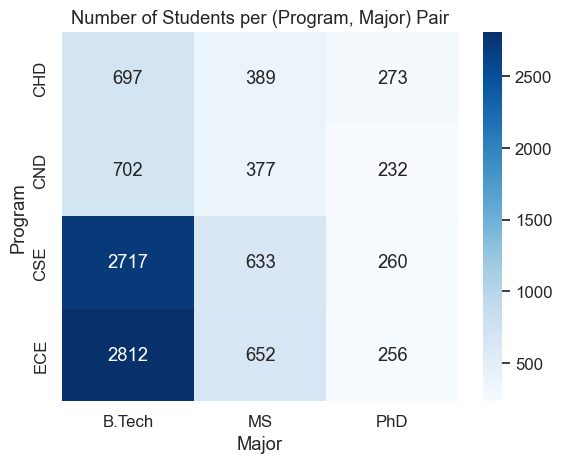


GPA Mean: 7.33
GPA Standard Deviation: 1.04


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students

        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)
        self.dataset = self.assemble_dataframe()

    def generate_gender(self):
        return np.random.choice(["Male", "Female", "Other"], size=self.num_students, p=[0.65, 0.33, 0.02])

    def generate_major(self):
        return np.random.choice(["B.Tech", "MS", "PhD"], size=self.num_students, p=[0.7, 0.2, 0.1])

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif m == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return np.array(programs)

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif m == "MS":
                mu, sigma = 8.0, 0.7
            else:
                mu, sigma = 8.3, 0.5
            gpa = np.clip(np.random.normal(mu, sigma), 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return np.array(gpas)

    def assemble_dataframe(self):
        return pd.DataFrame({
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        })

    def get_full_dataframe(self):
        return self.dataset

    # ----------------------------
    # (b) GPA Summary
    # ----------------------------
    def gpa_mean_std(self):
        mean_gpa = round(self.dataset["GPA"].mean(), 2)
        std_gpa = round(self.dataset["GPA"].std(), 2)
        return mean_gpa, std_gpa

    # ----------------------------
    # (c) Program-Major Combination Analysis
    # ----------------------------
    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """Return count of students per (Program, Major) pair."""
        counts = (
            self.dataset.groupby(["Program", "Major"])
            .size()
            .reset_index(name="Count")
        )
        return counts

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
        """Visualize the counts using a heatmap."""
        pivot_table = counts_df.pivot(index="Program", columns="Major", values="Count")
        sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
        plt.title("Number of Students per (Program, Major) Pair")
        plt.ylabel("Program")
        plt.xlabel("Major")
        plt.show()


# ----------------------------
# RUNNING AND DISPLAYING OUTPUT
# ----------------------------
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

# Compute counts per (Program, Major) pair
counts_df = dataset.count_students_per_program_major_pair()
print("✅ Counts of Students per (Program, Major) Pair:")
print(counts_df)

# Visualize as heatmap
dataset.visualize_students_per_program_major_pair(counts_df)

# Summary of GPA mean/std
mean_gpa, std_gpa = dataset.gpa_mean_std()
print("\nGPA Mean:", mean_gpa)
print("GPA Standard Deviation:", std_gpa)


In [7]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students

        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)
        self.dataset = self.assemble_dataframe()

    def generate_gender(self):
        return np.random.choice(["Male", "Female", "Other"], size=self.num_students, p=[0.65, 0.33, 0.02])

    def generate_major(self):
        return np.random.choice(["B.Tech", "MS", "PhD"], size=self.num_students, p=[0.7, 0.2, 0.1])

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif m == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return np.array(programs)

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif m == "MS":
                mu, sigma = 8.0, 0.7
            else:
                mu, sigma = 8.3, 0.5
            gpa = np.clip(np.random.normal(mu, sigma), 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return np.array(gpas)

    def assemble_dataframe(self):
        return pd.DataFrame({
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        })

    def get_full_dataframe(self):
        return self.dataset

    # --------------------------------------------------
    # Q1.2 (a) Simple Random Sampling
    # --------------------------------------------------
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        mean_gpas = []
        for _ in range(repeats):
            sample = self.dataset.sample(n, replace=False)
            mean_gpas.append(sample["GPA"].mean())

        avg_mean = round(np.mean(mean_gpas), 3)
        std_of_means = round(np.std(mean_gpas), 3)
        return avg_mean, std_of_means

    # --------------------------------------------------
    # Q1.2 (b) Stratified Sampling by Major
    # --------------------------------------------------
    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        mean_gpas = []
        major_props = self.dataset["Major"].value_counts(normalize=True)

        for _ in range(repeats):
            stratified_samples = []
            for major, prop in major_props.items():
                n_major = int(round(prop * n))
                sample_major = self.dataset[self.dataset["Major"] == major].sample(n_major, replace=False)
                stratified_samples.append(sample_major)
            sample_df = pd.concat(stratified_samples)
            mean_gpas.append(sample_df["GPA"].mean())

        avg_mean = round(np.mean(mean_gpas), 3)
        std_of_means = round(np.std(mean_gpas), 3)
        return avg_mean, std_of_means


# --------------------------------------------------
# RUN & REPORT RESULTS
# --------------------------------------------------
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

# Simple random sampling
mean_random, std_random = dataset.get_gpa_mean_std_random()
# Stratified sampling
mean_strat, std_strat = dataset.get_gpa_mean_std_stratified()

print("✅ Q1.2 Sampling Results")
print(f"Simple Random Sampling -> Avg Mean GPA: {mean_random}, Std of Means: {std_random}")
print(f"Stratified Sampling     -> Avg Mean GPA: {mean_strat}, Std of Means: {std_strat}")

# Compare which is more stable
if std_strat < std_random:
    print("\nObservation: Stratified sampling has lower standard deviation of sample means.")
    print("Reason: It ensures each major is proportionally represented, reducing sampling bias.")
else:
    print("\nObservation: Simple random sampling had similar or lower variability (rare).")


✅ Q1.2 Sampling Results
Simple Random Sampling -> Avg Mean GPA: 7.335, Std of Means: 0.048
Stratified Sampling     -> Avg Mean GPA: 7.337, Std of Means: 0.039

Observation: Stratified sampling has lower standard deviation of sample means.
Reason: It ensures each major is proportionally represented, reducing sampling bias.


✅ Gender-Balanced Sampling (5 Repeats):
Sample 1: {'Male': 100, 'Female': 100, 'Other': 100}
Sample 2: {'Male': 100, 'Female': 100, 'Other': 100}
Sample 3: {'Male': 100, 'Female': 100, 'Other': 100}
Sample 4: {'Male': 100, 'Female': 100, 'Other': 100}
Sample 5: {'Male': 100, 'Female': 100, 'Other': 100}

🎯 Sampling Strategy A (5 Repeats):
Sample 1: {'Male': 111, 'Other': 96, 'Female': 93}
Sample 2: {'Other': 116, 'Female': 93, 'Male': 91}
Sample 3: {'Female': 106, 'Other': 102, 'Male': 92}
Sample 4: {'Male': 109, 'Female': 102, 'Other': 89}
Sample 5: {'Female': 111, 'Other': 95, 'Male': 94}


C:\Users\prana\AppData\Local\Temp\ipykernel_112192\2965137738.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_sizes, y=avg_diffs, palette="Blues_d")


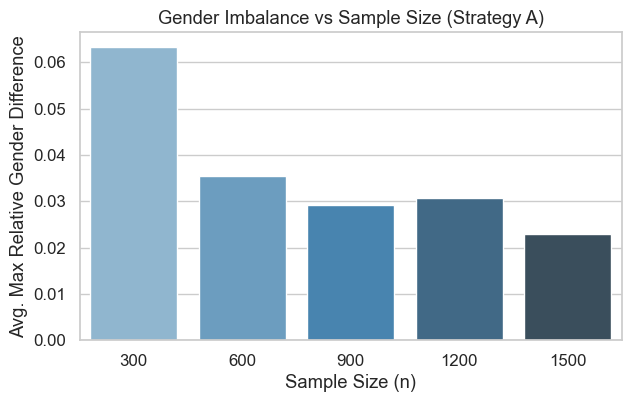


📊 Average Max Relative Gender Difference by Sample Size:
{300: np.float64(0.0633), 600: np.float64(0.0355), 900: np.float64(0.0292), 1200: np.float64(0.0308), 1500: np.float64(0.0229)}


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students

        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)
        self.dataset = self.assemble_dataframe()

    # ---------- Dataset Generation ----------
    def generate_gender(self):
        return np.random.choice(["Male", "Female", "Other"],
                                size=self.num_students,
                                p=[0.65, 0.33, 0.02])

    def generate_major(self):
        return np.random.choice(["B.Tech", "MS", "PhD"],
                                size=self.num_students,
                                p=[0.7, 0.2, 0.1])

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif m == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return np.array(programs)

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif m == "MS":
                mu, sigma = 8.0, 0.7
            else:
                mu, sigma = 8.3, 0.5
            gpa = np.clip(np.random.normal(mu, sigma), 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return np.array(gpas)

    def assemble_dataframe(self):
        return pd.DataFrame({
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        })

    def get_full_dataframe(self):
        return self.dataset

    # ---------- Q1.3 (a) Gender-Balanced Sampling ----------
    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Sample n students with equal gender representation."""
        results = []
        genders = self.dataset["Gender"].unique()
        per_gender = n // len(genders)

        for _ in range(repeats):
            samples = []
            for g in genders:
                group = self.dataset[self.dataset["Gender"] == g]
                sample = group.sample(per_gender, replace=False)
                samples.append(sample)
            balanced_sample = pd.concat(samples)
            counts = balanced_sample["Gender"].value_counts().to_dict()
            results.append(counts)
        return results

    # ---------- Q1.3 (b) Strategy A Sampling ----------
    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Sampling Strategy A: choose gender uniformly, then student from that gender."""
        results = []
        genders = self.dataset["Gender"].unique()
        gender_probs = [1/len(genders)] * len(genders)

        for _ in range(repeats):
            sampled_genders = np.random.choice(genders, size=n, p=gender_probs)
            sampled_students = []
            for g in sampled_genders:
                student = self.dataset[self.dataset["Gender"] == g].sample(1)
                sampled_students.append(student)
            sample_df = pd.concat(sampled_students)
            counts = sample_df["Gender"].value_counts().to_dict()
            results.append(counts)
        return results

    # ---------- Q1.3 (c) Relative Difference vs Sample Size ----------
    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
        """Plot histogram of average max relative gender difference across sample sizes."""
        avg_diffs = []
        genders = self.dataset["Gender"].unique()
        gender_probs = [1/len(genders)] * len(genders)

        for n in sample_sizes:
            diffs = []
            for _ in range(repeats):
                sampled_genders = np.random.choice(genders, size=n, p=gender_probs)
                counts = pd.Series(sampled_genders).value_counts()
                diff = (counts.max() - counts.min()) / n
                diffs.append(diff)
            avg_diffs.append(np.mean(diffs))

        # Plot results
        plt.figure(figsize=(7, 4))
        sns.barplot(x=sample_sizes, y=avg_diffs, palette="Blues_d")
        plt.xlabel("Sample Size (n)")
        plt.ylabel("Avg. Max Relative Gender Difference")
        plt.title("Gender Imbalance vs Sample Size (Strategy A)")
        plt.show()

        # Return numeric summary for reporting
        return dict(zip(sample_sizes, [round(v, 4) for v in avg_diffs]))


# ------------------------------
# RUN & DISPLAY OUTPUT
# ------------------------------
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

# (a) Gender-balanced samples
balanced_counts = dataset.get_gender_balanced_counts()
print("✅ Gender-Balanced Sampling (5 Repeats):")
for i, c in enumerate(balanced_counts, 1):
    print(f"Sample {i}: {c}")

# (b) Strategy A random gender-based sampling
strategyA_counts = dataset.sample_gender_uniform_random()
print("\n🎯 Sampling Strategy A (5 Repeats):")
for i, c in enumerate(strategyA_counts, 1):
    print(f"Sample {i}: {c}")

# (c) Plot relative difference vs sample size
summary_diffs = dataset.plot_avg_max_gender_diff_vs_sample_size([300, 600, 900, 1200, 1500])
print("\n📊 Average Max Relative Gender Difference by Sample Size:")
print(summary_diffs)


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students

        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)
        self.dataset = self.assemble_dataframe()

    # ---------- Dataset Generation ----------
    def generate_gender(self):
        return np.random.choice(["Male", "Female", "Other"],
                                size=self.num_students,
                                p=[0.65, 0.33, 0.02])

    def generate_major(self):
        return np.random.choice(["B.Tech", "MS", "PhD"],
                                size=self.num_students,
                                p=[0.7, 0.2, 0.1])

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif m == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return np.array(programs)

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif m == "MS":
                mu, sigma = 8.0, 0.7
            else:
                mu, sigma = 8.3, 0.5
            gpa = np.clip(np.random.normal(mu, sigma), 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return np.array(gpas)

    def assemble_dataframe(self):
        return pd.DataFrame({
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        })

    def get_full_dataframe(self):
        return self.dataset

    # ---------- Q1.4 (a) GPA-Uniform Sampling ----------
    def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
        """
        Select students such that GPA values are approximately uniformly distributed across bins.
        """
        df = self.dataset.copy()
        df["GPA_bin"] = pd.cut(df["GPA"], bins=bins, labels=False)

        # Target count per bin for uniform distribution
        target_per_bin = n // bins
        sampled_students = []

        for bin_id in range(bins):
            bin_group = df[df["GPA_bin"] == bin_id]
            if len(bin_group) >= target_per_bin:
                sampled_students.append(bin_group.sample(target_per_bin, replace=False))
            else:
                # If not enough in bin, sample with replacement to maintain uniformity
                sampled_students.append(bin_group.sample(target_per_bin, replace=True))

        sampled_df = pd.concat(sampled_students).drop(columns=["GPA_bin"]).reset_index(drop=True)
        return sampled_df

    # ---------- Q1.4 (b) Histogram Comparison ----------
    def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame) -> None:
        """
        Compare GPA histogram of sampled dataset vs original dataset.
        """
        plt.figure(figsize=(8, 4))
        sns.histplot(self.dataset["GPA"], bins=10, color="skyblue", label="Original GPA Dist", kde=True)
        sns.histplot(sampled_df["GPA"], bins=10, color="orange", label="Uniform Sample GPA Dist", kde=True)
        plt.xlabel("GPA")
        plt.ylabel("Count")
        plt.title("Comparison of GPA Distributions: Original vs Uniform Sample")
        plt.legend()
        plt.show()


✅ Sampled 100 Students with Uniform GPA Distribution:
   Gender   Major Program   GPA
0    Male  B.Tech     CSE  4.00
1    Male  B.Tech     CHD  4.50
2    Male  B.Tech     CND  4.54
3    Male  B.Tech     CSE  4.00
4  Female  B.Tech     ECE  4.50


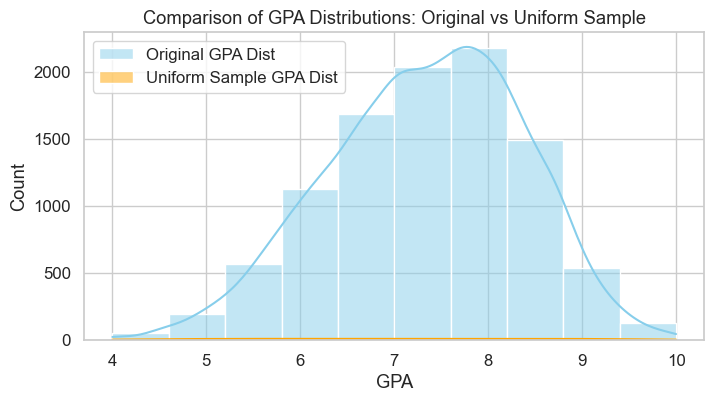

In [10]:
# Initialize dataset
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

# (a) Sample GPA-uniform cohort
uniform_sample = dataset.sample_gpa_uniform(n=100, bins=10)
print("✅ Sampled 100 Students with Uniform GPA Distribution:")
print(uniform_sample.head())

# (b) Plot histogram comparison
dataset.plot_gpa_histogram_comparison(uniform_sample)


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        np.random.seed(seed)
        self.num_students = num_students

        self.gender = self.generate_gender()
        self.major = self.generate_major()
        self.program = self.generate_program(self.major)
        self.gpa = self.generate_gpa(self.major)
        self.dataset = self.assemble_dataframe()

    # ---------- Dataset Generation ----------
    def generate_gender(self):
        return np.random.choice(["Male", "Female", "Other"],
                                size=self.num_students,
                                p=[0.65, 0.33, 0.02])

    def generate_major(self):
        return np.random.choice(["B.Tech", "MS", "PhD"],
                                size=self.num_students,
                                p=[0.7, 0.2, 0.1])

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif m == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return np.array(programs)

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == "B.Tech":
                mu, sigma = 7.0, 1.0
            elif m == "MS":
                mu, sigma = 8.0, 0.7
            else:
                mu, sigma = 8.3, 0.5
            gpa = np.clip(np.random.normal(mu, sigma), 4.0, 10.0)
            gpas.append(round(gpa, 2))
        return np.array(gpas)

    def assemble_dataframe(self):
        return pd.DataFrame({
            "Gender": self.gender,
            "Major": self.major,
            "Program": self.program,
            "GPA": self.gpa
        })

    def get_full_dataframe(self):
        return self.dataset

    # ---------- Q1.5 (a) Program–Major Balanced Sampling ----------
    def sample_program_major_balanced(self, n: int = 60) -> pd.DataFrame:
        """
        Sample students so that all (Program, Major) combinations are represented roughly equally.
        """
        df = self.dataset.copy()
        combos = df.groupby(["Program", "Major"])
        valid_combos = list(combos.groups.keys())

        # Equal samples per (program, major)
        target_per_combo = n // len(valid_combos)
        sampled_list = []

        for combo in valid_combos:
            subset = combos.get_group(combo)
            if len(subset) >= target_per_combo:
                sampled = subset.sample(target_per_combo, replace=False)
            else:
                # If too small, sample with replacement to maintain balance
                sampled = subset.sample(target_per_combo, replace=True)
            sampled_list.append(sampled)

        sampled_df = pd.concat(sampled_list).reset_index(drop=True)
        return sampled_df

    # ---------- Q1.5 (b) Show Counts + Heatmap ----------
    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
        """
        Display counts of program-major combinations and visualize via heatmap.
        """
        counts = sampled_df.groupby(["Program", "Major"]).size().unstack(fill_value=0)
        print("✅ Program–Major Counts:")
        print(counts)

        plt.figure(figsize=(6, 4))
        sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu")
        plt.title("Program–Major Balanced Sample Heatmap")
        plt.xlabel("Major")
        plt.ylabel("Program")
        plt.show()


✅ Program–Major Counts:
Major    B.Tech  MS  PhD
Program                 
CHD           5   5    5
CND           5   5    5
CSE           5   5    5
ECE           5   5    5


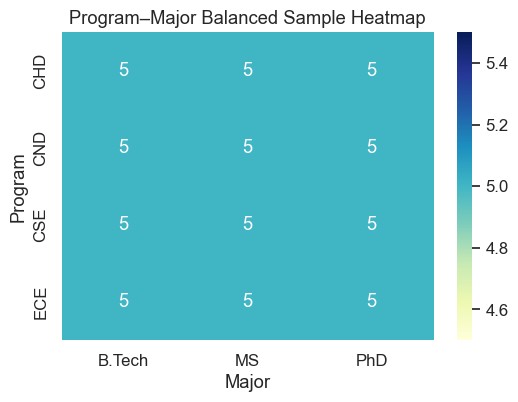

In [12]:

# Initialize dataset
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

# (a) Sample Program–Major Balanced cohort
sampled_df = dataset.sample_program_major_balanced(n=60)

# (b) Show counts + heatmap
dataset.show_program_major_counts_and_heatmap(sampled_df)


Q3.0 Linear Regression with Regularization

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
def run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                        degree=1, regularizer=None, reg_strength=0.0):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    if regularizer == "l1":
        model = Lasso(alpha=reg_strength, max_iter=10000)
    elif regularizer == "l2":
        model = Ridge(alpha=reg_strength)
    else:
        model = LinearRegression()

    model.fit(X_train_poly, y_train)

    y_pred_train = model.predict(X_train_poly)
    y_pred_val = model.predict(X_val_poly)
    y_pred_test = model.predict(X_test_poly)

    return {
        "train_mse": mean_squared_error(y_train, y_pred_train),
        "val_mse": mean_squared_error(y_val, y_pred_val),
        "test_mse": mean_squared_error(y_test, y_pred_test),
        "coefficients": model.coef_,
        "features": poly.get_feature_names_out()
    }


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
np.random.seed(42)


c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.2476e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.07598e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.12096e-27): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


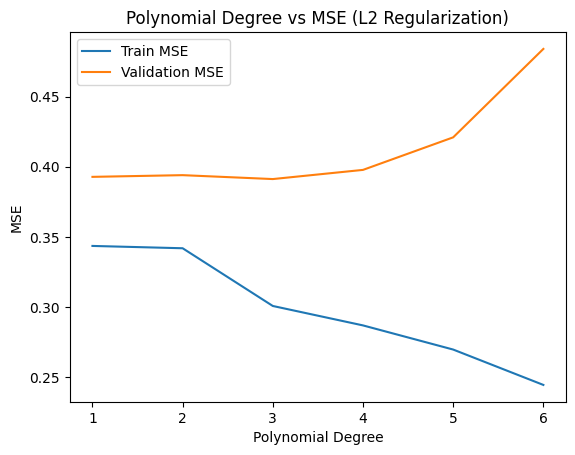

In [6]:
# Synthetic data for GPA regression
np.random.seed(42)
df = pd.DataFrame({
    "study_hours": np.random.uniform(0, 20, 200),
    "attendance": np.random.uniform(60, 100, 200),
    "GPA": np.random.uniform(2.0, 4.0, 200)
})

X = df[["study_hours", "attendance"]].values
y = df["GPA"].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

degrees = range(1, 7)
reg_strengths = np.logspace(-4, 2, 10)

# Example: Compare L2 regularization across degrees
results = []
for d in degrees:
    res = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                              degree=d, regularizer="l2", reg_strength=0.1)
    results.append((d, res["train_mse"], res["val_mse"]))

df_results = pd.DataFrame(results, columns=["degree", "train_mse", "val_mse"])
plt.plot(df_results["degree"], df_results["train_mse"], label="Train MSE")
plt.plot(df_results["degree"], df_results["val_mse"], label="Validation MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Polynomial Degree vs MSE (L2 Regularization)")
plt.legend()
plt.show()


k-nearest neighbours

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
class PerFeatureTransformer:
    def __init__(self):
        self.transformers = {}

    def fit(self, df: pd.DataFrame, params: dict[str, str]) -> None:
        for feature, ttype in params.items():
            if ttype == "standard":
                scaler = StandardScaler()
                scaler.fit(df[[feature]])
                self.transformers[feature] = ("standard", scaler)
            elif ttype == "ordinal":
                encoder = OrdinalEncoder()
                encoder.fit(df[[feature]])
                self.transformers[feature] = ("ordinal", encoder)
            elif ttype == "onehot":
                encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
                encoder.fit(df[[feature]])
                self.transformers[feature] = ("onehot", encoder)

    def transform(self, df: pd.DataFrame) -> np.ndarray:
        transformed = []
        for feature, (ttype, trans) in self.transformers.items():
            arr = trans.transform(df[[feature]])
            transformed.append(arr)
        return np.concatenate(transformed, axis=1)

    def fit_transform(self, df: pd.DataFrame, params: dict[str, str]) -> np.ndarray:
        self.fit(df, params)
        return self.transform(df)


In [9]:
class KNNGenderPredictor:
    def __init__(self, student_df: pd.DataFrame, username: str):
        self.df = student_df
        self.username = username
        self.feature_transformer = PerFeatureTransformer()
        self.fitted = False

    def train_val_test_split(self, test_size=0.2, val_size=0.2, seed=42):
        train_df, test_df = train_test_split(self.df, test_size=test_size, random_state=seed)
        train_df, val_df = train_test_split(train_df, test_size=val_size, random_state=seed)
        return train_df, val_df, test_df

    def get_feature_matrix_and_labels(self, df, features):
        X = self.feature_transformer.transform(df)
        y = df["gender"].map({"male": 0, "female": 1}).values
        return X, y

    def get_knn_accuracy_vs_k(self, X_train, y_train, X_val, y_val, k_values, distance="euclidean"):
        accs = []
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)
            accs.append(accuracy_score(y_val, y_pred))
        return accs

    def plot_knn_accuracy_vs_k(self, k_values, accuracies, distance):
        plt.figure(figsize=(8,5))
        plt.plot(k_values, accuracies, marker='o')
        plt.title(f"KNN Accuracy vs k ({distance})")
        plt.xlabel("k")
        plt.ylabel("Validation Accuracy")
        plt.grid(True)
        plt.show()

    def get_knn_f1_heatmap(self, X_train, y_train, X_val, y_val, k_values, distances):
        results = {}
        for dist in distances:
            f1s = []
            for k in k_values:
                knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_val)
                f1s.append(f1_score(y_val, y_pred))
            results[dist] = f1s
        df = pd.DataFrame(results, index=k_values)
        return df

    def plot_knn_f1_heatmap(self, f1_scores_df):
        plt.figure(figsize=(8,6))
        sns.heatmap(f1_scores_df, annot=True, fmt=".3f", cmap="coolwarm")
        plt.title("F1 Score Heatmap (k × Distance)")
        plt.xlabel("Distance Metric")
        plt.ylabel("k")
        plt.show()

    def get_knn_f1_single_feature_table(self, train_df, val_df, test_df, features, k_values, distance="euclidean"):
        results = pd.DataFrame(index=k_values, columns=features)
        for feat in features:
            params = {feat: "standard" if np.issubdtype(train_df[feat].dtype, np.number) else "onehot"}
            self.feature_transformer = PerFeatureTransformer()
            X_train = self.feature_transformer.fit_transform(train_df[[feat]], params)
            X_test = self.feature_transformer.transform(test_df[[feat]])
            y_train = train_df["gender"].map({"male": 0, "female": 1}).values
            y_test = test_df["gender"].map({"male": 0, "female": 1}).values
            for k in k_values:
                knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                results.loc[k, feat] = f1_score(y_test, y_pred)
        return results


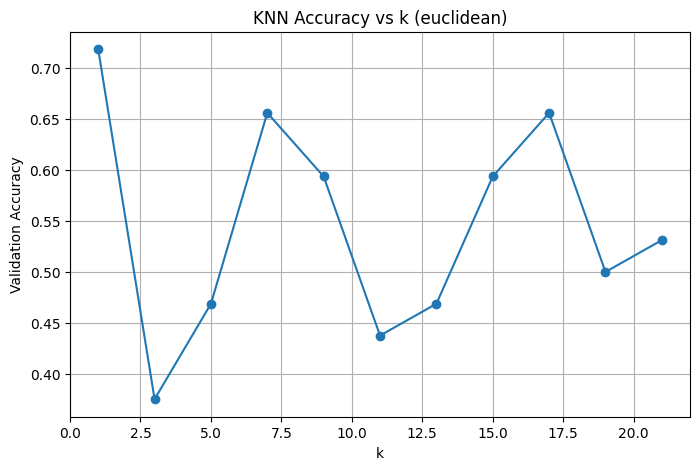

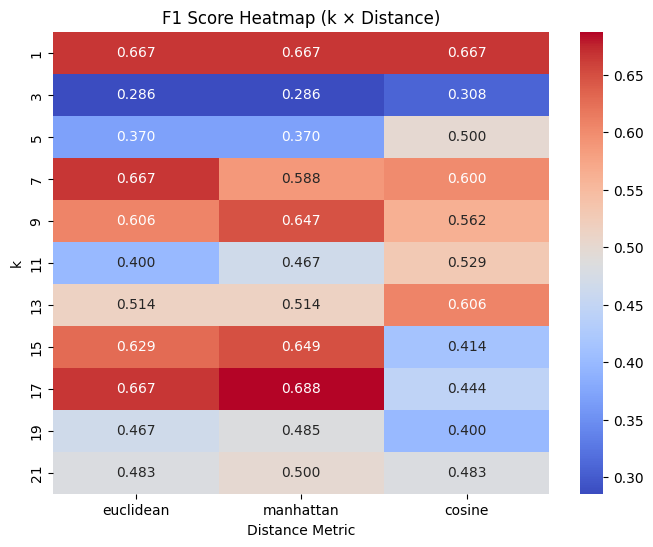

    euclidean  manhattan    cosine
1    0.666667   0.666667  0.666667
3    0.285714   0.285714  0.307692
5    0.370370   0.370370  0.500000
7    0.666667   0.588235  0.600000
9    0.606061   0.647059  0.562500
11   0.400000   0.466667  0.529412
13   0.514286   0.514286  0.606061
15   0.628571   0.648649  0.413793
17   0.666667   0.687500  0.444444
19   0.466667   0.484848  0.400000
21   0.482759   0.500000  0.482759
         GPA   major   program
1       0.45  0.4375  0.380952
3   0.368421    0.24  0.380952
5   0.315789    0.24  0.380952
7   0.444444  0.4375  0.380952
9   0.486486  0.4375  0.380952
11  0.473684  0.4375  0.380952
13  0.439024  0.4375  0.380952
15  0.409091  0.4375       0.0
17  0.454545  0.4375  0.380952
19  0.454545  0.4375  0.380952
21  0.380952  0.4375       0.0


In [10]:
# Example synthetic dataset
np.random.seed(42)
student_df = pd.DataFrame({
    "GPA": np.random.uniform(2.0, 4.0, 200),
    "major": np.random.choice(["CS", "Math", "Physics", "Bio"], 200),
    "program": np.random.choice(["UG", "PG"], 200),
    "gender": np.random.choice(["male", "female"], 200)
})

features = ["GPA", "major", "program"]
params = {"GPA": "standard", "major": "ordinal", "program": "onehot"}

model = KNNGenderPredictor(student_df, username="student_user")

train_df, val_df, test_df = model.train_val_test_split()

# Fit transformer
model.feature_transformer.fit(train_df[features], params)
X_train, y_train = model.get_feature_matrix_and_labels(train_df, features)
X_val, y_val = model.get_feature_matrix_and_labels(val_df, features)

# Accuracy vs k (Euclidean)
k_values = list(range(1, 22, 2))
acc_euclidean = model.get_knn_accuracy_vs_k(X_train, y_train, X_val, y_val, k_values, "euclidean")
model.plot_knn_accuracy_vs_k(k_values, acc_euclidean, "euclidean")

# F1 Heatmap
distances = ["euclidean", "manhattan", "cosine"]
f1_df = model.get_knn_f1_heatmap(X_train, y_train, X_val, y_val, k_values, distances)
model.plot_knn_f1_heatmap(f1_df)
print(f1_df)

# Single feature F1 table
f1_single = model.get_knn_f1_single_feature_table(train_df, val_df, test_df, features, k_values)
print(f1_single)
